In [5]:
steps = [
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it make predictions on our data",
    "4. Evaluating a model",
    "5. Improve the model",
    "6. Save and load a trained model",
    "7. Putting it all together!" ]

In [9]:
# Standards imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Getting the data ready

In [14]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df
# A tuple of two ndarrays by default. The first contains a 2D ndarray of shape (569, 30) with each row representing one sample and each column representing the features.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
# We combine the tuples into the same DataFrame, having the last column as diagnostic, the variable we are gonna predict based on the other 30 explanatories variables.
df['diagnostic'] = breast_cancer['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [57]:
# Import algorithm/estimator
# Setup random seed
np.random.seed(42)

# Create the data
x = df.drop('diagnostic', axis=1)
y = df['diagnostic']

In [58]:
#Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [59]:
# Create random forest model
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.9649122807017544

In [61]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Make predictions using a machine learning model

In [62]:
x_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [63]:
# Used a trained model to make predictions
model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [64]:
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [65]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(x_test)
np.mean(y_preds == y_test)

0.9649122807017544

In [75]:
# Second different way to get the mean accuracy on the given test data and labels
model_single_score = model.score(x_test, y_test)

Make predictions with 'predict' and 'predict_proba()'

In [67]:
model.predict(x_test[:5])

array([1, 0, 0, 1, 1])

In [68]:
model.predict_proba(x_test[:5])

array([[0.03, 0.97],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ]])

## Evaluating a model using the scoring parameter

### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### Accurary

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
model.score(x_test, y_test)

0.9649122807017544

In [76]:
cross_val_score(model,x,y, cv=5)

array([0.92105263, 0.95614035, 0.99122807, 0.97368421, 0.97345133])

In [77]:
model_cross_val_score = np.mean(cross_val_score(model,x,y, cv=5))

In [78]:
# Compare the two scores
model_single_score, model_cross_val_score

(0.9649122807017544, 0.9578326346840553)

In [86]:
print(f"Breast Cancer Disease Classifier Cross-Validated Accuracy: {np.mean(model_cross_val_score) *100:.2f}%")

Breast Cancer Disease Classifier Cross-Validated Accuracy: 95.78%


### Area under ROC curve

In [89]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = model.predict_proba(x_test)

In [91]:
y_probs[:10], len(y_probs)

(array([[0.03, 0.97],
        [1.  , 0.  ],
        [0.99, 0.01],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.91, 0.09],
        [0.68, 0.32],
        [0.03, 0.97]]),
 114)

In [92]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.97, 0.  , 0.01, 1.  , 1.  , 0.  , 0.  , 0.09, 0.32, 0.97, 0.96,
       0.01, 0.92, 0.15, 0.98, 0.02, 0.95, 1.  , 1.  , 0.  , 0.84, 0.99,
       0.  , 0.99, 0.99, 0.95, 0.99, 0.9 , 1.  , 0.  , 0.99, 1.  , 0.8 ,
       0.95, 1.  , 1.  , 0.26, 0.94, 0.  , 0.91, 1.  , 0.02, 1.  , 1.  ,
       0.82, 0.97, 0.9 , 0.99, 0.97, 0.99, 0.  , 0.  , 0.74, 0.85, 1.  ,
       0.99, 1.  , 0.  , 0.23, 1.  , 0.99, 0.  , 0.  , 0.92, 0.99, 0.92,
       0.  , 0.  , 1.  , 0.97, 0.13, 0.  , 0.99, 0.  , 0.98, 0.94, 0.98,
       0.71, 1.  , 0.97, 0.04, 1.  , 0.61, 0.  , 0.1 , 0.03, 0.13, 0.01,
       0.98, 0.95, 1.  , 0.71, 0.84, 0.93, 1.  , 1.  , 0.  , 0.  , 1.  ,
       0.01, 0.08, 1.  , 0.  , 0.  , 0.96, 0.99, 0.98, 0.  , 0.53, 0.89,
       0.01, 0.99, 0.78, 0.  ])

In [93]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02325581, 0.02325581,
       0.04651163, 0.06976744, 0.06976744, 0.13953488, 0.18604651,
       0.30232558, 0.34883721, 0.46511628, 1.        ])

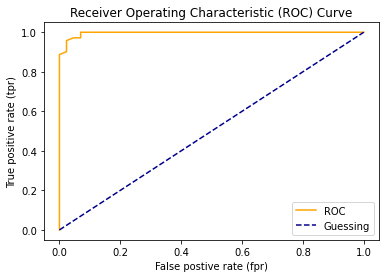

In [94]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

# Plot roc curve, we define a function
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label = 'Guessing')
    plt.xlabel('False postive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [95]:
from sklearn.metrics import roc_auc_score
# Calculating the area under the curve
roc_auc_score(y_test, y_probs_positive)

0.996069439895185

## Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[40,  3],
       [ 1, 70]])

In [97]:
# Visualize confusion matrix
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Label'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,40,3
1,1,70


In [106]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

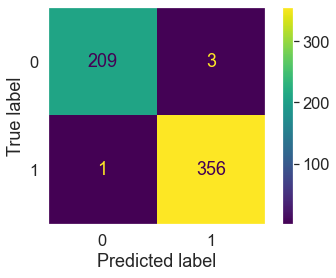

In [108]:
ConfusionMatrixDisplay.from_estimator(estimator = model, X=x, y=y)
plt.grid(False)

In [105]:
# The classification report is important to detect if the model is actually useful for positive and negative predictions, for which accuracy is not enough.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Improving a model

In [111]:
Since it is not possible to collect more data netiher it is to improve the quality of the data, we proceed to focus on the hyperparameters.
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### There are 3 ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### Tuning hyperparameters by hand
Hyperparameters that will be adjust: max_depth, max_features, min_samples_leaf, min_sample_split, n_estimators
Let´s make 3 sets, training, validation (to evaluate hyperparameters) and test (to evaluate the model)

In [154]:
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                  'precision': round(precision,2),
                  'recall': round(recall,2),
                  'f1': round(f1,2)}
    print(f'Acc: {accuracy *100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    
    return metric_dict

In [155]:
# Shuffle the data
df_shuffled = df.sample(frac=1)

In [156]:
# Split into x & y
X = df_shuffled.drop('diagnostic', axis=1)
y = df_shuffled['diagnostic']

# Split the data into train, validation and test sets
train_split = round(0.7 * len(df_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(df_shuffled)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

(398, 85, 86)

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [158]:
model.fit(x_train, y_train)

# Make baseline predictions
y_preds = model.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 63.53%
Precision: 0.69
Recall: 0.84
F1 score: 0.76


{'accuracy': 0.64, 'precision': 0.69, 'recall': 0.84, 'f1': 0.76}